##주가연계증권(Equity-Linked Securities, ELS)
주가연계증권(Equity-Linked Securities, ELS)은 기초 자산의 성과에 따라 수익이 결정되는 금융 상품으로, 주가연계예금(ELD)과 비슷하지만 원금이 보장되지 않을 수도 있습니다. 다양한 형태의 ELS가 있습니다.

In [1]:
import matplotlib.font_manager as fm
import matplotlib.pyplot as plt

# Google Colab에 NanumGothic 폰트 설치
!apt-get update -qq
!apt-get install fonts-nanum* -qq

# 설치된 폰트 확인 및 matplotlib에 적용
font_path = '/usr/share/fonts/truetype/nanum/NanumGothic.ttf'
font = fm.FontProperties(fname=font_path)
fm.fontManager.addfont(font_path)
plt.rc('font', family='NanumGothic')

Selecting previously unselected package fonts-nanum.
(Reading database ... 121925 files and directories currently installed.)
Preparing to unpack .../fonts-nanum_20200506-1_all.deb ...
Unpacking fonts-nanum (20200506-1) ...
Selecting previously unselected package fonts-nanum-coding.
Preparing to unpack .../fonts-nanum-coding_2.5-3_all.deb ...
Unpacking fonts-nanum-coding (2.5-3) ...
Selecting previously unselected package fonts-nanum-eco.
Preparing to unpack .../fonts-nanum-eco_1.000-7_all.deb ...
Unpacking fonts-nanum-eco (1.000-7) ...
Selecting previously unselected package fonts-nanum-extra.
Preparing to unpack .../fonts-nanum-extra_20200506-1_all.deb ...
Unpacking fonts-nanum-extra (20200506-1) ...
Setting up fonts-nanum-extra (20200506-1) ...
Setting up fonts-nanum (20200506-1) ...
Setting up fonts-nanum-coding (2.5-3) ...
Setting up fonts-nanum-eco (1.000-7) ...
Processing triggers for fontconfig (2.13.1-4.2ubuntu5) ...


초기 가격: 4369.55
최종 가격: 5567.19
수익률: 0.30
수익: 1310.86


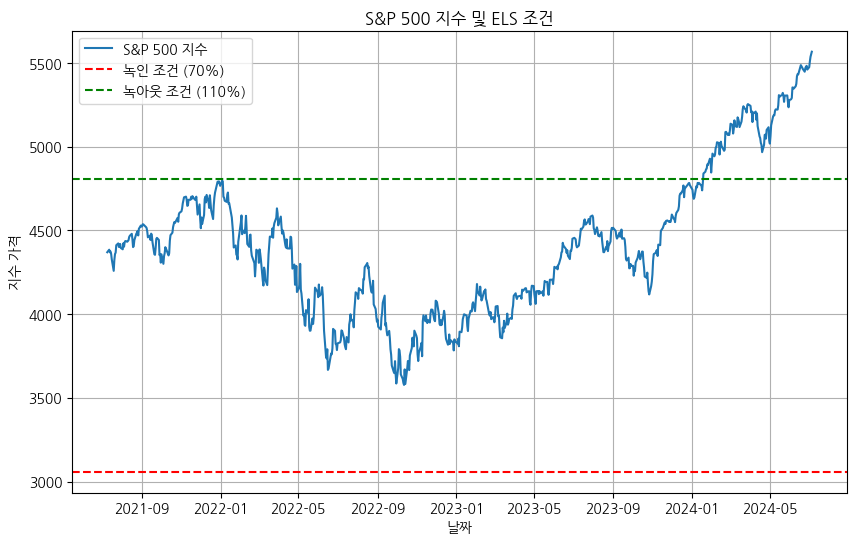

In [ ]:
import numpy as np
import yfinance as yf
import matplotlib.pyplot as plt
from datetime import datetime, timedelta

# ELS의 수익률 계산 함수
def els_return(prices, initial_price, maturity, coupon_rate, knock_in_barrier, knock_out_barrier, observation_dates):
    """
    prices: 기초 자산의 가격 배열
    initial_price: 기초 자산의 초기 가격
    maturity: 만기 기간 (년 단위)
    coupon_rate: 쿠폰 금리
    knock_in_barrier: 녹인 조건 (기초 자산 가격이 이 값 이하로 떨어지면 원금 손실 가능)
    knock_out_barrier: 녹아웃 조건 (기초 자산 가격이 이 값 이상이면 조기 상환)
    observation_dates: 조기 상환 관찰 날짜 배열
    """
    # 초기 설정
    total_return = 0
    is_knock_in = False

    # 녹아웃 조건 확인
    for i in observation_dates:
        # Check if the observation date is within the bounds of the prices array
        if i < len(prices):
            if prices[i] >= initial_price * knock_out_barrier:
                total_return = coupon_rate * (i + 1) / len(observation_dates)
                return total_return

    # 만기 시점 처리
    if min(prices) <= initial_price * knock_in_barrier:
        is_knock_in = True

    if is_knock_in:
        total_return = (prices[-1] - initial_price) / initial_price
    else:
        total_return = coupon_rate * maturity

    return total_return

# 실제 데이터 가져오기
# S&P 500 지수 데이터
sp500 = yf.Ticker("^GSPC")
end_date = datetime.now()
start_date = end_date - timedelta(days=3*365)
sp500_data = sp500.history(start=start_date, end=end_date)
prices = sp500_data['Close'].values
initial_price = prices[0]  # 초기 가격

# 기본 변수 설정
maturity = 3  # 만기 기간 (3년)
coupon_rate = 0.1  # 쿠폰 금리 (10%)
knock_in_barrier = 0.7  # 녹인 조건 (70%)
knock_out_barrier = 1.1  # 녹아웃 조건 (110%)
observation_dates = np.array([252, 504, 756])  # 조기 상환 관찰 날짜 (매년)

# ELS의 수익률 계산
total_return = els_return(prices, initial_price, maturity, coupon_rate, knock_in_barrier, knock_out_barrier, observation_dates)
profit = total_return * initial_price

print(f"초기 가격: {initial_price:.2f}")
print(f"최종 가격: {prices[-1]:.2f}")
print(f"수익률: {total_return:.2f}")
print(f"수익: {profit:.2f}")

# 시각화
dates = sp500_data.index

plt.figure(figsize=(10, 6))
plt.plot(dates, prices, label='S&P 500 지수')
plt.axhline(y=initial_price * knock_in_barrier, color='r', linestyle='--', label='녹인 조건 (70%)')
plt.axhline(y=initial_price * knock_out_barrier, color='g', linestyle='--', label='녹아웃 조건 (110%)')
plt.xlabel('날짜')
plt.ylabel('지수 가격')
plt.title('S&P 500 지수 및 ELS 조건')
plt.legend()
plt.grid(True)
plt.show()


###ELS(주가연계증권)와 ELD(주가연계예금)의 주요 차이점

1. 원금 보장 여부:

  - ELD (주가연계예금):
원금 보장이 일반적입니다. 투자한 원금이 보호되며, 기초 자산의 성과에 따라 추가 수익이 발생합니다.
  - ELS (주가연계증권):
원금 보장이 없는 경우가 많습니다. 기초 자산의 성과에 따라 원금 손실이 발생할 수 있습니다. 대신, 높은 수익을 기대할 수 있는 구조를 가지고 있습니다.

2. 수익 구조:

  - ELD (주가연계예금):
기초 자산의 성과가 특정 조건을 만족하면 추가 수익이 발생합니다. 예를 들어, 기초 자산의 가격이 일정 수준 이상 상승하면 고정된 이자를 추가로 지급합니다.
  - ELS (주가연계증권):
다양한 구조를 가질 수 있으며, 일반적으로 기초 자산의 가격이 일정 수준을 초과하거나 미만일 때 특정 수익을 지급합니다. 예를 들어, 스텝다운형 ELS는 기초 자산의 가격이 일정 수준 이상이면 조기 상환되고, 그렇지 않으면 만기까지 유지됩니다.

3. 투자 기간:

  - ELD (주가연계예금):
일반적으로 일정한 투자 기간이 있으며, 만기 시 원금과 수익이 지급됩니다.
  - ELS (주가연계증권):
투자 기간이 다양하며, 조기 상환 조건이 포함될 수 있습니다. 기초 자산의 가격이 일정 조건을 만족하면 조기 상환되어 투자 기간이 단축될 수 있습니다.

4. 위험과 수익:

  - ELD (주가연계예금):
원금이 보장되기 때문에 상대적으로 안전하지만, 수익도 제한적입니다.
  - ELS (주가연계증권):
원금 손실 가능성이 있지만, 높은 수익을 기대할 수 있습니다. 기초 자산의 가격 변동에 따라 수익이 결정됩니다.


###요약
1. ELD (주가연계예금):

원금 보장이 일반적.
기초 자산의 성과에 따라 추가 수익.
상대적으로 안전.
수익은 제한적.


2. ELS (주가연계증권):

원금 손실 가능성 있음.
기초 자산의 성과에 따라 높은 수익 가능.
다양한 구조와 조건.
위험이 높지만, 수익도 높을 수 있음.

초기 가격: 4384.63
최종 가격: 5572.85
수익률: 0.30
최종 투자 금액: 7150.00
수익: 1650.00


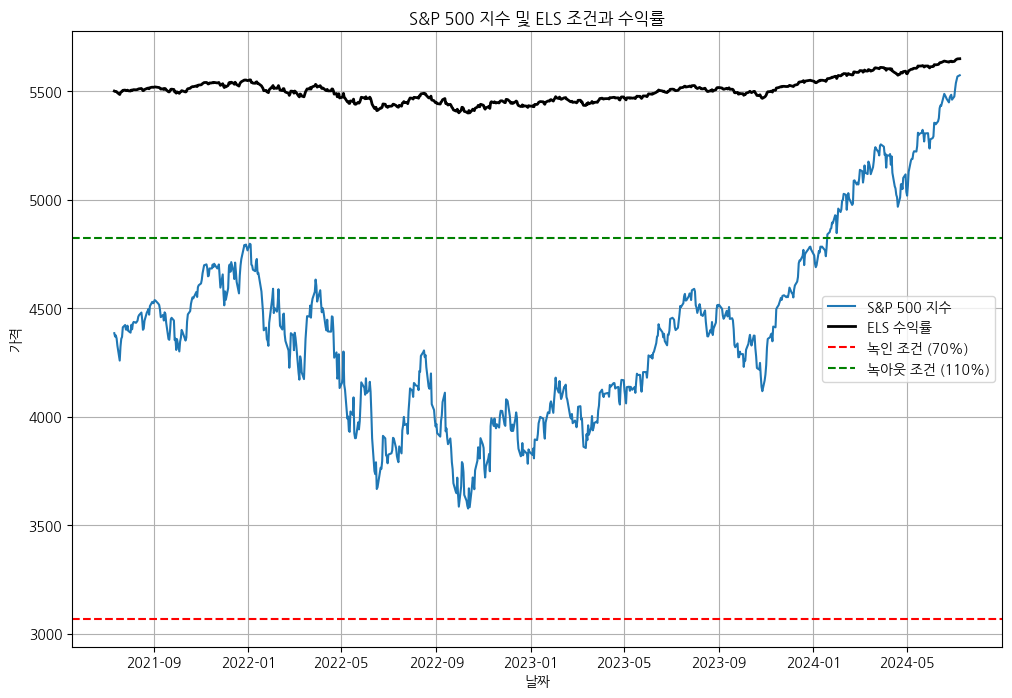

In [3]:
import numpy as np
import yfinance as yf
import matplotlib.pyplot as plt
from datetime import datetime, timedelta

# ELS의 수익률 계산 함수
def els_return(prices, initial_price, maturity, coupon_rate, knock_in_barrier, knock_out_barrier, observation_dates):
    """
    prices: 기초 자산의 가격 배열
    initial_price: 기초 자산의 초기 가격
    maturity: 만기 기간 (년 단위)
    coupon_rate: 쿠폰 금리
    knock_in_barrier: 녹인 조건 (기초 자산 가격이 이 값 이하로 떨어지면 원금 손실 가능)
    knock_out_barrier: 녹아웃 조건 (기초 자산 가격이 이 값 이상이면 조기 상환)
    observation_dates: 조기 상환 관찰 날짜 배열
    """
    # 초기 설정
    total_return = 0
    is_knock_in = False

    # 녹아웃 조건 확인
    for i in observation_dates:
        # Check if the observation date is within the bounds of the prices array
        if i < len(prices):
            if prices[i] >= initial_price * knock_out_barrier:
                total_return = coupon_rate * (i + 1) / len(observation_dates)
                return total_return

    # 만기 시점 처리
    if min(prices) <= initial_price * knock_in_barrier:
        is_knock_in = True

    if is_knock_in:
        total_return = (prices[-1] - initial_price) / initial_price
    else:
        total_return = coupon_rate * maturity

    return total_return

# 실제 데이터 가져오기
# S&P 500 지수 데이터
sp500 = yf.Ticker("^GSPC")
end_date = datetime.now()
start_date = end_date - timedelta(days=3*365)
sp500_data = sp500.history(start=start_date, end=end_date)
prices = sp500_data['Close'].values
initial_price = prices[0]  # 초기 가격

# 기본 변수 설정
maturity = 3  # 만기 기간 (3년)
coupon_rate = 0.1  # 쿠폰 금리 (10%)
knock_in_barrier = 0.7  # 녹인 조건 (70%)
knock_out_barrier = 1.1  # 녹아웃 조건 (110%)
observation_dates = np.array([252, 504, 756])  # 조기 상환 관찰 날짜 (매년)

# ELS의 수익률 계산
total_return = els_return(prices, initial_price, maturity, coupon_rate, knock_in_barrier, knock_out_barrier, observation_dates)
initial_investment = 5500  # 초기 투자 금액
final_investment = initial_investment * (1 + total_return)
profit = final_investment - initial_investment

print(f"초기 가격: {initial_price:.2f}")
print(f"최종 가격: {prices[-1]:.2f}")
print(f"수익률: {total_return:.2f}")
print(f"최종 투자 금액: {final_investment:.2f}")
print(f"수익: {profit:.2f}")

# ELS 수익률 시계열 계산
els_prices = initial_investment * (1 + (prices / initial_price - 1) * coupon_rate)

# 시각화
dates = sp500_data.index

plt.figure(figsize=(12, 8))
plt.plot(dates, prices, label='S&P 500 지수')
plt.plot(dates, els_prices, label='ELS 수익률', linewidth=2, color='black')
plt.axhline(y=initial_price * knock_in_barrier, color='r', linestyle='--', label='녹인 조건 (70%)')
plt.axhline(y=initial_price * knock_out_barrier, color='g', linestyle='--', label='녹아웃 조건 (110%)')
plt.xlabel('날짜')
plt.ylabel('가격')
plt.title('S&P 500 지수 및 ELS 조건과 수익률')
plt.legend()
plt.grid(True)
plt.show()
